In [1]:
# !pip install -r requirements.txt

import pandas as pd
from utils.LabelsDict import tickers
from utils.setup import setup_enviroment

setup_enviroment()

from utils.portfolio import Portfolio
from utils.logger import Logger
log = Logger(__name__)

In [2]:
# No Logger class to reset; handlers are cleared above if needed

# Define tickers list
tickers_list = [
    'GAZP', 'LKOH', 'ROSN',
    'SBER', 'VTBR', 'MOEX',
    'GMKN', 'NLMK', 'RUAL',
    'MTSS', 'RTKM', 'TTLK',
    'MGNT', 'FESH',  #LENT
]

# Recreate the Portfolio instance with the updated code
calc = Portfolio(
    dt_calc='2025-09-30',
    dt_start='2014-03-31',
    stocks_step=8,
    tickers_list=tickers_list
)
calc = calc.log_system_info()

2026-01-10 15:34:58,873:utils.portfolio:INFO: Configuration Parameters
Parameter                                                                                      Value
Calculation Date                                                                          2025-09-30
Start Date                                                                                2014-03-31
Stocks Step                                                                                        8
Tickers Count                                                                                     14
Tickers           GAZP, LKOH, ROSN, SBER, VTBR, MOEX, GMKN, NLMK, RUAL, MTSS, RTKM, TTLK, MGNT, FESH


In [3]:
# 2. Загрузка рыночных данных
calc = (
    calc
    .load_stock_data(
        use_backup_data=False,
        update_backup=False
    )
    .load_multipliers(
        use_backup=False,
        update_backup=False
    )
)

2026-01-10 15:34:58,894:utils.portfolio:INFO: Downloading all stock data from 2014-03-31 to 2025-09-30
2026-01-10 15:34:59,311:utils.load_data:INFO: Downloaded dates range for ticker GAZP : [2014-03-31 00:00:00 - 2025-10-01 00:00:00]
2026-01-10 15:34:59,641:utils.load_data:INFO: Downloaded dates range for ticker LKOH : [2014-03-31 00:00:00 - 2025-10-01 00:00:00]
2026-01-10 15:34:59,986:utils.load_data:INFO: Downloaded dates range for ticker ROSN : [2014-03-31 00:00:00 - 2025-10-01 00:00:00]
2026-01-10 15:35:00,290:utils.load_data:INFO: Downloaded dates range for ticker SBER : [2014-03-31 00:00:00 - 2025-10-01 00:00:00]
2026-01-10 15:35:00,619:utils.load_data:INFO: Downloaded dates range for ticker VTBR : [2014-03-31 00:00:00 - 2025-10-01 00:00:00]
2026-01-10 15:35:00,926:utils.load_data:INFO: Downloaded dates range for ticker MOEX : [2014-03-31 00:00:00 - 2025-10-01 00:00:00]
2026-01-10 15:35:01,282:utils.load_data:INFO: Downloaded dates range for ticker GMKN : [2014-03-31 00:00:00 - 2

In [4]:
calc = (
    calc
    .load_macro_data(
        update_inflation=False,
        update_rub_usd=False,
        update_unemployment=False
    )
    .create_portfolio()
    .add_dynamic_features()
    .add_merton_pd()
)

you are using nologin method, data you access may be limited


2026-01-10 15:35:07,619:utils.load_data:INFO: Unemployment data saved to data/macro/unemployment.xlsx
2026-01-10 15:35:07,620:utils.portfolio:INFO: Downloaded fresh unemployment data and updated backup
2026-01-10 15:35:07,628:utils.portfolio:INFO: Loaded Unemployment Data Period
Start Date    End Date
2014-03-31  2025-09-30
2026-01-10 15:35:07,906:utils.portfolio:INFO: Downloaded fresh inflation data and updated backup
2026-01-10 15:35:07,913:utils.portfolio:INFO: Loaded Inflation Data Period
Start Date    End Date
2014-03-31  2025-09-30
2026-01-10 15:35:07,917:utils.load_data:INFO: Downloading 4202 missing usd/rub exchange rates


100%|██████████| 4202/4202 [05:52<00:00, 11.91it/s]


2026-01-10 15:41:00,729:utils.load_data:INFO: Backup file for usd/rub exchange rates was updated. New dates range: 2014-03-31 : 2025-09-30
2026-01-10 15:41:00,730:utils.portfolio:INFO: Downloaded fresh USD/RUB exchange rate and updated backup
2026-01-10 15:41:00,747:utils.portfolio:INFO: Loaded USD/RUB Exchange Rate Period
Start Date    End Date
2014-03-31  2025-09-30
2026-01-10 15:41:01,145:utils.portfolio:INFO: Portfolio Missing Values Before Filling
Column                    Value
P/E                      15.31%
Долг, млрд руб           48.74%
Капитализация, млрд руб  17.29%
Чистый долг, млрд руб    11.79%
debt                     32.46%
2026-01-10 15:41:01,251:utils.portfolio:INFO: Portfolio Missing Values After Filling
Column                  Value
P/E                    15.31%
Долг, млрд руб         48.74%
Чистый долг, млрд руб  11.79%
2026-01-10 15:41:01,252:utils.portfolio:INFO: Portfolio Dimensions
Total Rows  Unique Companies                Date Range
40609                   

Solving Merton equations: 100%|██████████| 40609/40609 [01:59<00:00, 340.80it/s]

2026-01-10 15:43:00,512:utils.portfolio:INFO: Capital cost and capital volatility calculated.
2026-01-10 15:43:00,518:utils.portfolio:INFO: Merton's probabilities of default calculated.


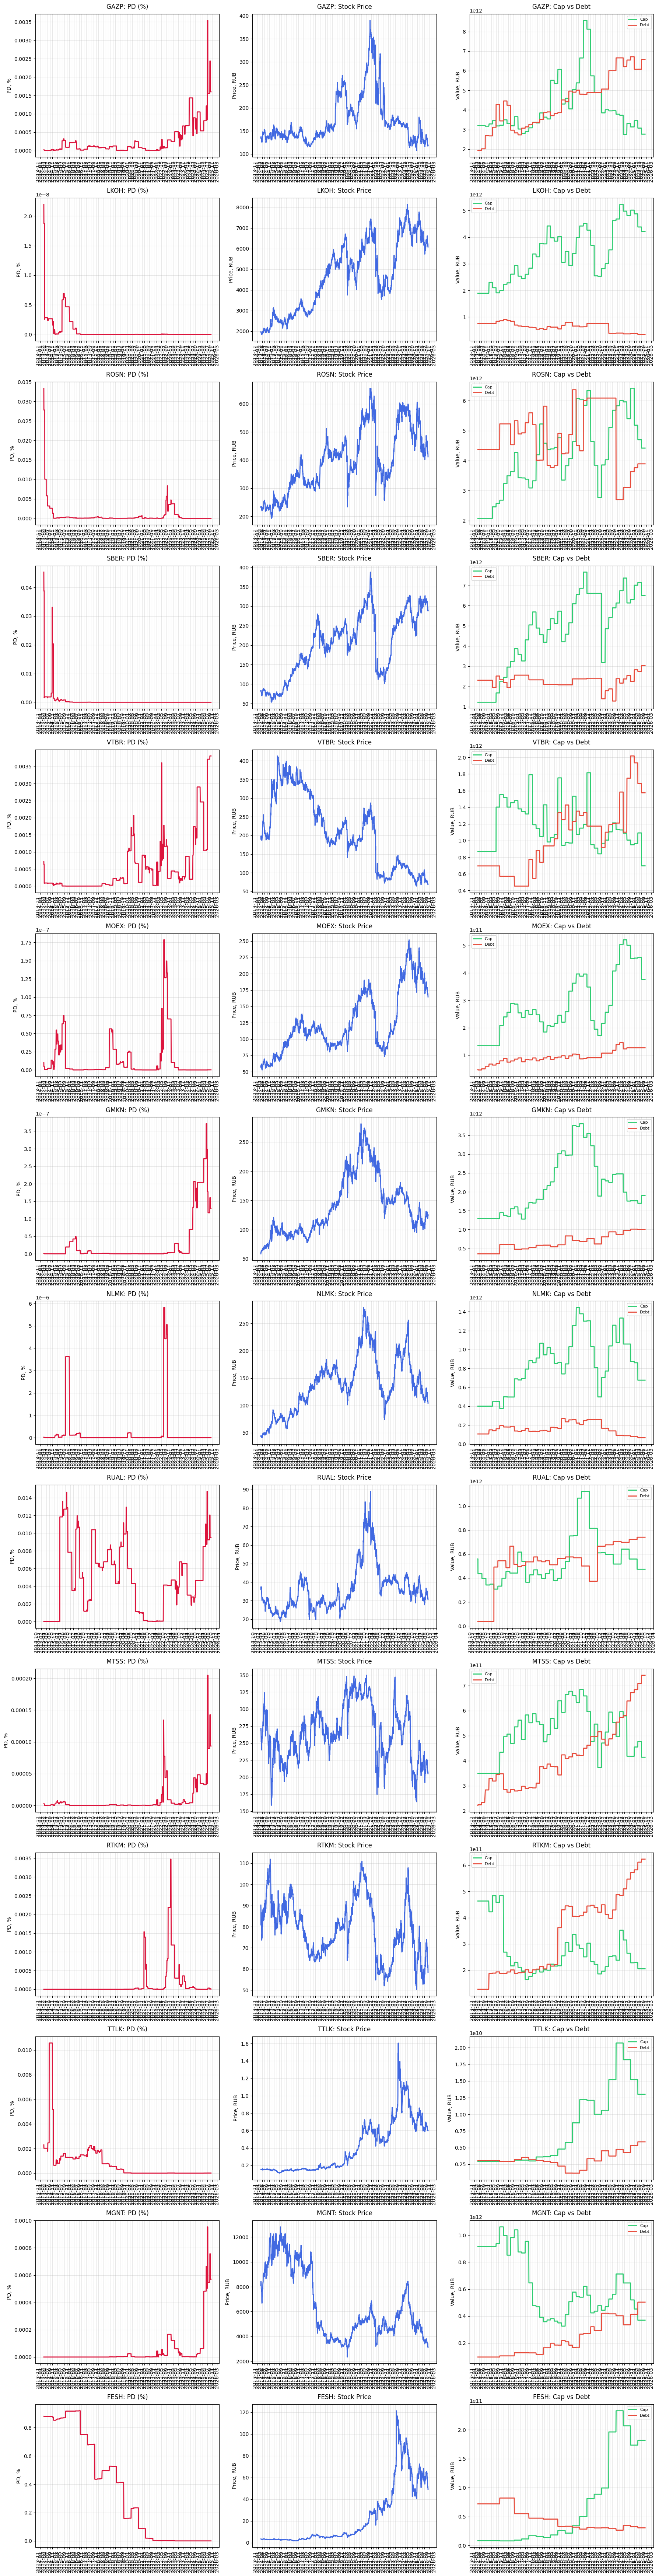

2026-01-10 15:44:05,628:utils.plots:INFO: Correlation matrix saved | Path: logs/graphs/corr_matrix.png


In [5]:
calc = (
    calc
    .plot_ticker_dashboards(tickers=tickers_list, verbose=True)
    .plot_correlation_matrix(custom_order = [                 # нарисовать матрицу корреляций
        'GAZP', 'LKOH', 'ROSN',                               # Нефтегазовая отрасль
        'SBER', 'VTBR', 'MOEX',                               # Финансовый сектор
        'GMKN', 'NLMK', 'RUAL',                               # Металлургия
        'MTSS', 'RTKM', 'TTLK',                               # Телекоммуникации
        'MGNT', 'LNTA', 'FESH'                                # Розничная торговля
    ], verbose=False)
)

2026-01-10 15:44:05,662:utils.portfolio:INFO: Visualizing Expanding Window backtest for last 3 months


c:\Users\Maxim\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Maxim\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


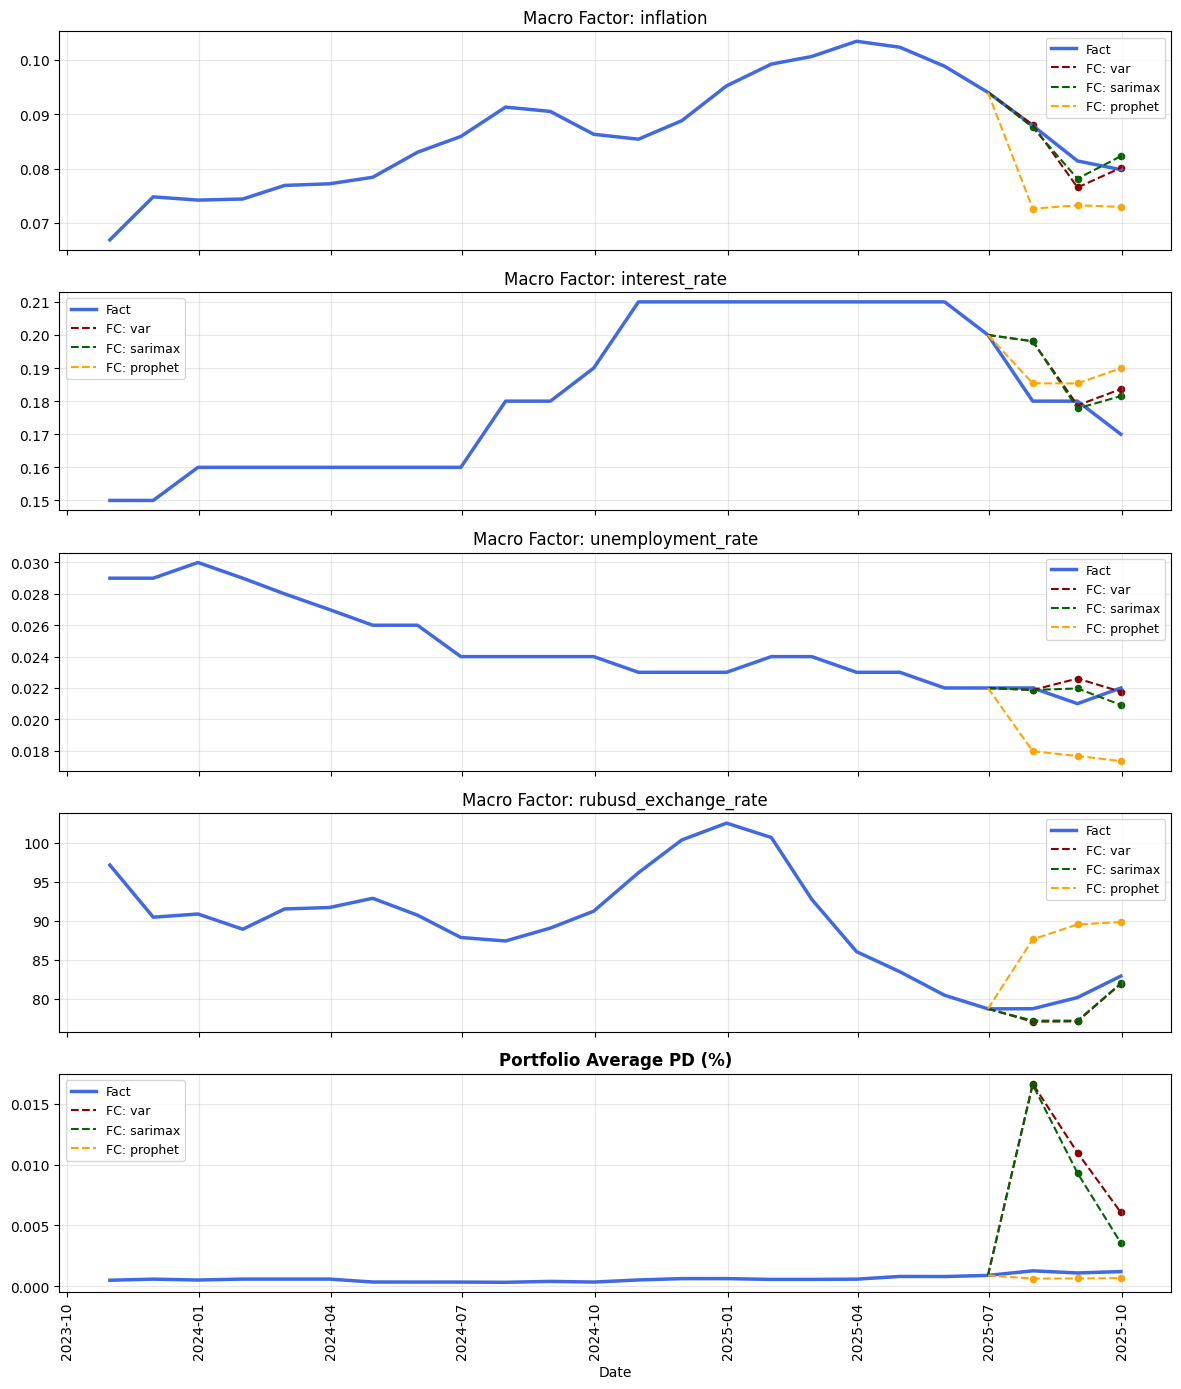

2026-01-10 15:44:20,299:utils.plots:INFO: Macro comparison plot saved: logs/graphs/macro_pd_comparison.png


In [6]:
# Вы можете передать список моделей ['var', 'sarimax', 'prophet'] для сравнения
calc = calc.plot_macro_forecast(
    horizon=-3,
    models=['var', 'sarimax', 'prophet'],
    tail=24,
    verbose=True
)

In [7]:
#TODO: прогнозировать DD а не PD для большей точности

In [8]:
# calc.calc_irf(impulses_responses = {                          # расчитать функции импульсного отклика
#     'inflation': 'PD', 'interest_rate': 'PD',
#     'rubusd_exchange_rate': 'PD', 'unemployment_rate': 'PD'
# }, verbose=True)
# calc.calc_macro_connections()                                 # расчитать регрессию для макропараметров
# calc.log_completion()                                         # вывести в лог сообщение об окончании расчета